2.1.1 Sobel edge detector

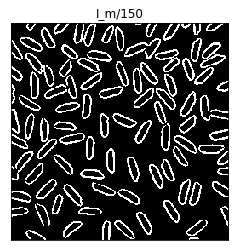

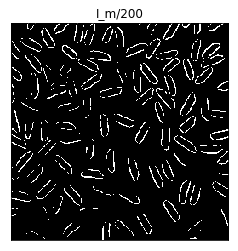

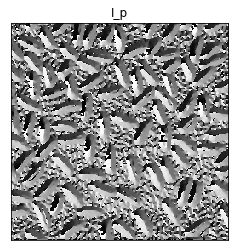

In [9]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

# load image with grayscale
image_rice_path = "rice.png"
img = cv2.imread(image_rice_path, cv2.IMREAD_GRAYSCALE)

# apply 3x3 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)
I_p = cv2.phase(I_x, I_y)

# apply different threshold to the image 
ret,thresh1 = cv2.threshold(I_m,150,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(I_m,200,255,cv2.THRESH_BINARY)

# display images
plt.imshow(thresh1,cmap="gray")
plt.title("I_m/150"), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(thresh2,cmap="gray")
plt.title("I_m/200"), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(I_p,cmap="gray")
plt.title("I_p"), plt.xticks([]), plt.yticks([])
plt.show()



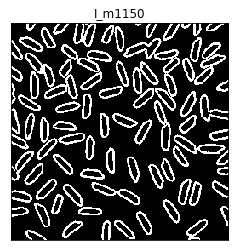

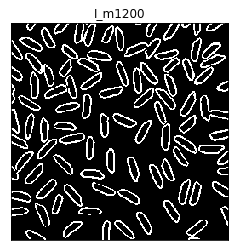

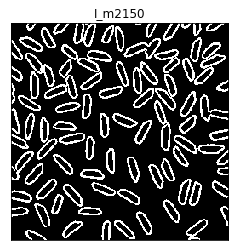

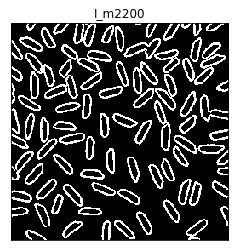

In [10]:
# The same code for getting the sharpened images
# load image
image_rice_path = "rice.png"
img_rice = cv2.imread(image_rice_path,cv2.IMREAD_GRAYSCALE)
# create kernel for box filter
kernel = np.ones((5,5), np.float32)/(5*5)
res1 = cv2.filter2D(img_rice, -1, kernel)

# using formulars to get the sharpened image
img_rice1 = (img_rice+(img_rice-res1))

# gaussian filter
res2 = cv2.GaussianBlur(img_rice, (5,5), 2**(.5),2**(.5))

# using formulars to get the sharpened image
img_rice2 = img_rice+img_rice-res2



I_x = cv2.Sobel(img_rice1, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img_rice1, cv2.CV_64F, 0, 1, ksize=3)
# compute sobel Magnitude/Phase
I_m1 = cv2.magnitude(I_x, I_y)

# apply threshold for the image using box filter
ret,thresh1 = cv2.threshold(I_m1,150,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(I_m1,200,255,cv2.THRESH_BINARY)

I_x = cv2.Sobel(img_rice2, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img_rice2, cv2.CV_64F, 0, 1, ksize=3)
# compute sobel Magnitude/Phase
I_m2 = cv2.magnitude(I_x, I_y)

# apply threshold for the image using gaussian filter
ret,thresh3 = cv2.threshold(I_m2,150,255,cv2.THRESH_BINARY)
ret,thresh4 = cv2.threshold(I_m2,150,255,cv2.THRESH_BINARY)

#display images
plt.imshow(thresh1,cmap="gray")
plt.title("I_m1150"), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(thresh2,cmap="gray")
plt.title("I_m1200"), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(thresh3,cmap="gray")
plt.title("I_m2150"), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(thresh4,cmap="gray")
plt.title("I_m2200"), plt.xticks([]), plt.yticks([])
plt.show()

Sharpening gives a better result with both 150 and 200, the edges are more clear, especially with the threshold of 200, since the sharpening removed the blurry and improved the clearness of edges, which makes the edges brighter in some cases. Therefore, when doing a threshold of 200, we can see a more clear edge with sharpened pictures but not the blur picture.

2.1.2 max filter response

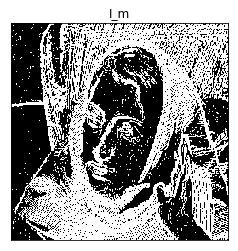

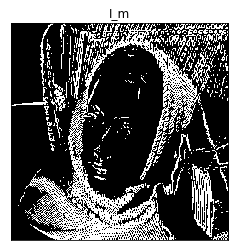

In [11]:
# load image
image_woman_path = "woman.png"
img = cv2.imread(image_woman_path, cv2.IMREAD_GRAYSCALE)

# apply 3x3 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# compute sobel Magnitude
I_m = cv2.magnitude(I_x, I_y)

# find the max value of filtered picture
a=np.amax(I_m)
# apply 10% and 20% max value filter to the image
ret,thresh1 = cv2.threshold(I_m,0.1*a,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(I_m,0.2*a,255,cv2.THRESH_BINARY)

# display images
plt.imshow(thresh1,cmap="gray")
plt.title("I_m"), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(thresh2,cmap="gray")
plt.title("I_m"), plt.xticks([]), plt.yticks([])
plt.show()

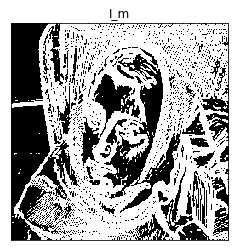

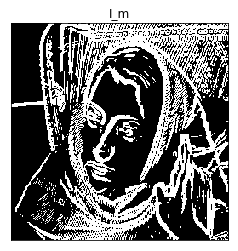

In [12]:
# load image
image_woman_path = "woman.png"
img = cv2.imread(image_woman_path,cv2.IMREAD_GRAYSCALE)

# create a kernel for box filter
kernel = np.ones((3,3), np.float32)/(3*3)

# apply a box filter
res2 = cv2.filter2D(img, -1, kernel)

# apply 3x3 Sobel filters to the intensity channel
I_x = cv2.Sobel(res2, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(res2, cv2.CV_64F, 0, 1, ksize=3)

# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)

# find the max value of filtered picture
a=np.amax(I_m)

# apply 10% and 20% max value filter to the image
ret,thresh1 = cv2.threshold(I_m,0.1*a,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(I_m,0.2*a,255,cv2.THRESH_BINARY)

# display images
plt.imshow(thresh1,cmap="gray")
plt.title("I_m"), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(thresh2,cmap="gray")
plt.title("I_m"), plt.xticks([]), plt.yticks([])
plt.show()

The sharpening gives more details into the pictures. As we can see from the comparision of the two sets of images, The set which is sobeled after sharpening has a better result, because the sharpening removed the blurry and makes the edges more clear.